In [1]:
# Gene Expression Analysis
# Mini projekt w Jupyter Notebook

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("ðŸ“Š Biblioteki zaÅ‚adowane pomyÅ›lnie!")

ðŸ“Š Biblioteki zaÅ‚adowane pomyÅ›lnie!


In [2]:
# StwÃ³rz wiÄ™kszy dataset (symulacja eksperymentu RNA-seq)
np.random.seed(42)

samples = []
genes = ['GENE_A', 'GENE_B', 'GENE_C', 'GENE_D', 'GENE_E']
conditions = ['Control', 'Treatment']

data_list = []

for condition in conditions:
    for i in range(1, 6):  # 5 replik
        sample_name = f"{condition}_{i}"
        row = {'Sample': sample_name, 'Condition': condition}
        
        for gene in genes:
            # Control: ekspresja bazowa
            if condition == 'Control':
                expression = np.random.normal(100, 15)
            # Treatment: niektÃ³re geny up/down regulated
            else:
                if gene in ['GENE_A', 'GENE_C']:  # Upregulated
                    expression = np.random.normal(250, 30)
                elif gene == 'GENE_D':  # Downregulated
                    expression = np.random.normal(50, 10)
                else:  # Bez zmian
                    expression = np.random.normal(100, 15)
            
            row[gene] = max(0, expression)  # Nie moÅ¼e byÄ‡ ujemna
        
        data_list.append(row)

df = pd.DataFrame(data_list)

print("âœ… Dataset stworzony!")
print(f"ðŸ“Š Wymiary: {df.shape[0]} prÃ³bek Ã— {df.shape[1]} kolumn")
df.head(10)

âœ… Dataset stworzony!
ðŸ“Š Wymiary: 10 prÃ³bek Ã— 7 kolumn


Sample  Condition      GENE_A      GENE_B      GENE_C      GENE_D  \
0    Control_1    Control  107.450712   97.926035  109.715328  122.845448   
1    Control_2    Control   96.487946  123.688192  111.511521   92.957884   
2    Control_3    Control   93.048735   93.014054  103.629434   71.300796   
3    Control_4    Control   91.565687   84.807533  104.713710   86.379639   
4    Control_5    Control  121.984732   96.613355  101.012923   78.628777   
5  Treatment_1  Treatment  253.327678   82.735096  261.270941   43.993613   
6  Treatment_2  Treatment  231.948802  127.784173  249.595083   39.422891   
7  Treatment_3  Treatment  213.374691  103.132954  191.209896   36.718140   
8  Treatment_4  Treatment  272.153997  102.570524  246.530552   46.988963   
9  Treatment_5  Treatment  228.404674   93.090418  281.713667   53.436183   

       GENE_E  
0   96.487699  
1  108.138401  
2   74.126233  
3   78.815444  
4   91.834259  
5   95.624594  
6  112.338174  
7  102.952919  
8   77.822170  
9   73.554398

In [3]:
# Podstawowe statystyki
print("ðŸ“ˆ Statystyki opisowe dla kaÅ¼dego genu:\n")
df[genes].describe()

ðŸ“ˆ Statystyki opisowe dla kaÅ¼dego genu:



GENE_A      GENE_B      GENE_C      GENE_D      GENE_E
count   10.000000   10.000000   10.000000   10.000000   10.000000
mean   170.974765  100.536234  176.090305   67.267233   91.169429
std     74.680730   14.861743   77.145810   28.111500   14.356636
min     91.565687   82.735096  101.012923   36.718140   73.554398
25%     99.228637   93.033145  105.964115   44.742451   78.070489
50%    167.679711   97.269695  151.360709   62.368490   93.729426
75%    231.062770  102.992346  248.828950   84.441923  101.336614
max    272.153997  127.784173  281.713667  122.845448  112.338174

In [4]:
# PorÃ³wnanie Å›rednich Control vs Treatment
print("ðŸ”¬ Åšrednia ekspresja: Control vs Treatment\n")

comparison = df.groupby('Condition')[genes].mean().T
comparison['Fold_Change'] = comparison['Treatment'] / comparison['Control']
comparison['Log2_FC'] = np.log2(comparison['Fold_Change'])
comparison

ðŸ”¬ Åšrednia ekspresja: Control vs Treatment



Condition     Control   Treatment  Fold_Change   Log2_FC
GENE_A     102.107562  239.841968     2.348915  1.231994
GENE_B      99.209834  101.862633     1.026739  0.038070
GENE_C     106.116583  246.064028     2.318808  1.213384
GENE_D      90.422509   44.111958     0.487843 -1.035512
GENE_E      89.880407   92.458451     1.028683  0.040799

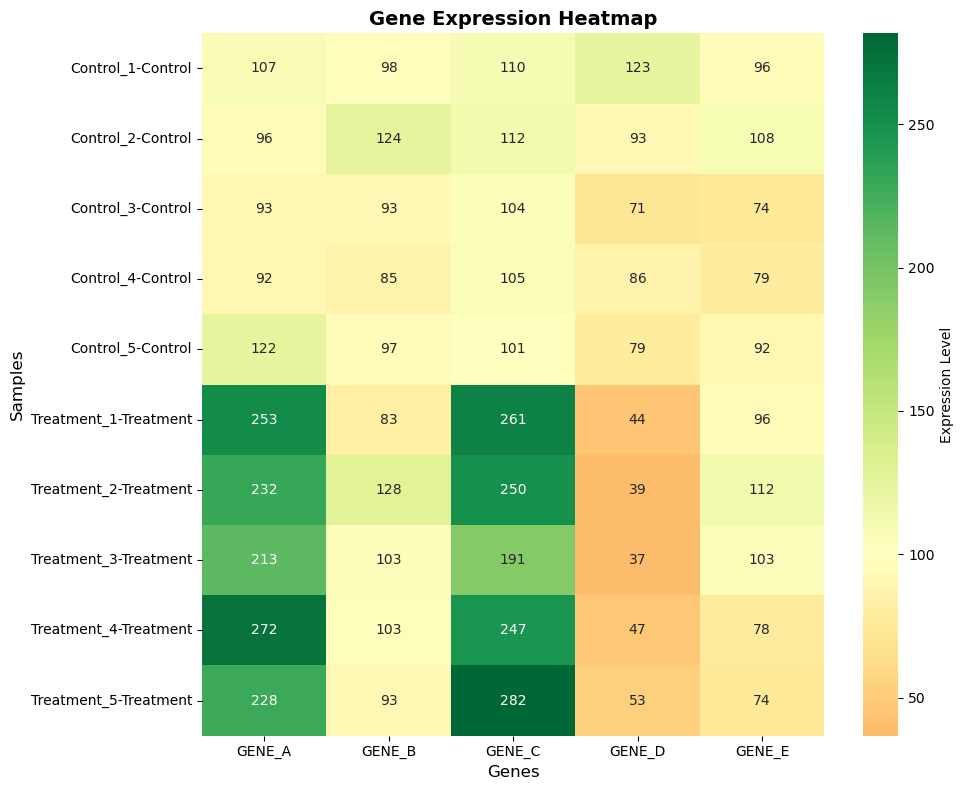

âœ… Heatmapa wygenerowana!


In [5]:
# Wykres 1: Heatmapa ekspresji
plt.figure(figsize=(10, 8))

# Przygotuj dane do heatmapy
heatmap_data = df.set_index(['Sample', 'Condition'])[genes]

sns.heatmap(heatmap_data, cmap='RdYlGn', center=100, 
            annot=True, fmt='.0f', cbar_kws={'label': 'Expression Level'})
plt.title('Gene Expression Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Genes', fontsize=12)
plt.ylabel('Samples', fontsize=12)
plt.tight_layout()
plt.show()

print("âœ… Heatmapa wygenerowana!")

/tmp/ipykernel_3167/1540334601.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Condition', y=gene, ax=axes[i], palette='Set2')
/tmp/ipykernel_3167/1540334601.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Condition', y=gene, ax=axes[i], palette='Set2')
/tmp/ipykernel_3167/1540334601.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Condition', y=gene, ax=axes[i], palette='Set2')
/tmp/ipykernel_3167/1540334601.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated

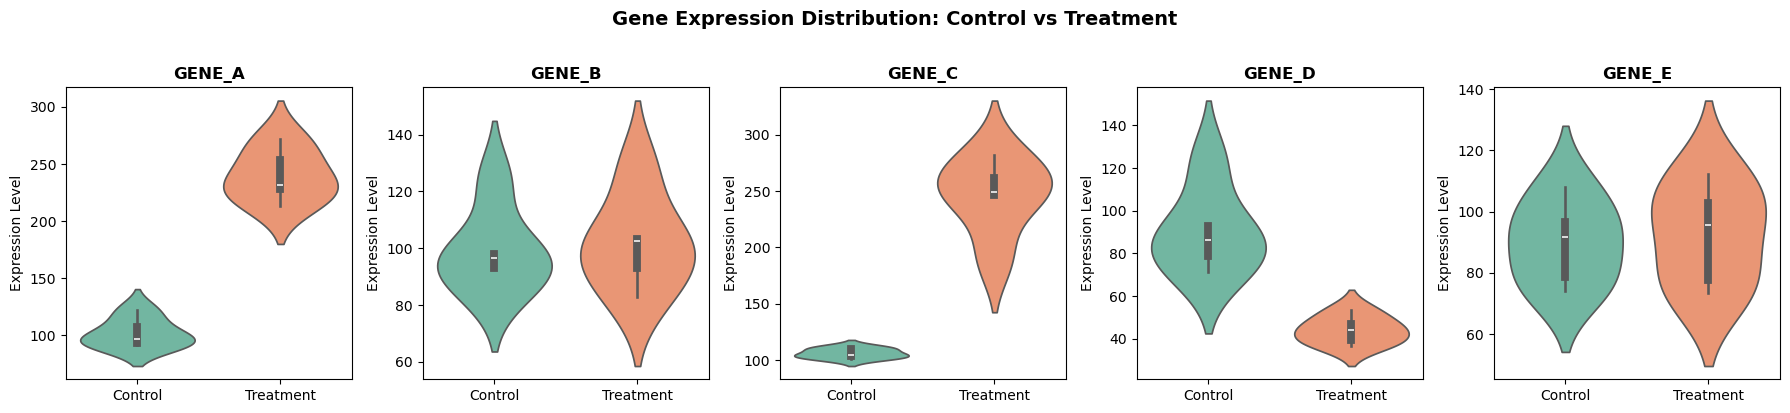

âœ… Violin plots wygenerowane!


In [6]:
# Wykres 2: Violin plot - porÃ³wnanie Control vs Treatment
fig, axes = plt.subplots(1, 5, figsize=(18, 4))

for i, gene in enumerate(genes):
    sns.violinplot(data=df, x='Condition', y=gene, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{gene}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Expression Level')

plt.suptitle('Gene Expression Distribution: Control vs Treatment', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("âœ… Violin plots wygenerowane!")

In [7]:
# Podsumowanie analizy
print("=" * 60)
print("ðŸ“Š PODSUMOWANIE ANALIZY")
print("=" * 60)

for gene in genes:
    control_mean = df[df['Condition'] == 'Control'][gene].mean()
    treatment_mean = df[df['Condition'] == 'Treatment'][gene].mean()
    fc = treatment_mean / control_mean
    log2fc = np.log2(fc)
    
    if abs(log2fc) > 1:  # |log2FC| > 1 = wiÄ™cej niÅ¼ 2x zmiana
        status = "ðŸ”´ SIGNIFICANTLY CHANGED"
    else:
        status = "âšª No significant change"
    
    print(f"\n{gene}:")
    print(f"  Control: {control_mean:.1f}")
    print(f"  Treatment: {treatment_mean:.1f}")
    print(f"  Fold Change: {fc:.2f}x")
    print(f"  Log2 FC: {log2fc:.2f}")
    print(f"  Status: {status}")

print("\n" + "=" * 60)
print("âœ… Analiza zakoÅ„czona!")
print("=" * 60)


ðŸ“Š PODSUMOWANIE ANALIZY

GENE_A:
  Control: 102.1
  Treatment: 239.8
  Fold Change: 2.35x
  Log2 FC: 1.23
  Status: ðŸ”´ SIGNIFICANTLY CHANGED

GENE_B:
  Control: 99.2
  Treatment: 101.9
  Fold Change: 1.03x
  Log2 FC: 0.04
  Status: âšª No significant change

GENE_C:
  Control: 106.1
  Treatment: 246.1
  Fold Change: 2.32x
  Log2 FC: 1.21
  Status: ðŸ”´ SIGNIFICANTLY CHANGED

GENE_D:
  Control: 90.4
  Treatment: 44.1
  Fold Change: 0.49x
  Log2 FC: -1.04
  Status: ðŸ”´ SIGNIFICANTLY CHANGED

GENE_E:
  Control: 89.9
  Treatment: 92.5
  Fold Change: 1.03x
  Log2 FC: 0.04
  Status: âšª No significant change

âœ… Analiza zakoÅ„czona!
